In [1]:
%cd '/content/Meteorite_Landings.csv'

[Errno 2] No such file or directory: '/content/Meteorite_Landings.csv'
/home/dwill148/Final


In [2]:
#imported everything I guess
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [3]:
#reading data
df=pd.read_csv('data/meteorite-landings.csv')
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [4]:
#Make the nametype data to numerical data from categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nametype'])
label

array([1, 1, 1, ..., 1, 1, 1])

In [5]:
df.drop("nametype", axis=1, inplace=True)
df["nametype"] = label


In [6]:
#Make the fall data to numerical data from categorical

le = LabelEncoder()
label1 = le.fit_transform(df['fall'])
df.drop("fall", axis=1, inplace=True)
df["fall"] = label1
df

,name,id,recclass,mass (g),year,reclat,reclong,GeoLocation,nametype,fall
0,Aachen,1,L5,21.0,1880.0,50.77500,6.08333,"(50.775, 6.08333)",1,0
1,Aarhus,2,H6,720.0,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",1,0
2,Abee,6,EH4,107000.0,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",1,0
3,Acapulco,10,Acapulcoite,1914.0,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",1,0
4,Achiras,370,L6,780.0,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",1,0
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Eucrite,172.0,1990.0,29.03700,17.01850,"(29.037, 17.0185)",1,1
45712,Zinder,30409,"Pallasite, ungrouped",46.0,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",1,1
45713,Zlin,30410,H4,3.3,1939.0,49.25000,17.66667,"(49.25, 17.66667)",1,1
45714,Zubkovsky,31357,L6,2167.0,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",1,1


In [7]:
#drop name and reclass column as they are not numerical, drop nan values
df_new=df.drop(['name','recclass','GeoLocation'], axis=1)
df_new=df_new.dropna()
df_new

,id,mass (g),year,reclat,reclong,nametype,fall
0,1,21.0,1880.0,50.77500,6.08333,1,0
1,2,720.0,1951.0,56.18333,10.23333,1,0
2,6,107000.0,1952.0,54.21667,-113.00000,1,0
3,10,1914.0,1976.0,16.88333,-99.90000,1,0
4,370,780.0,1902.0,-33.16667,-64.95000,1,0
...,...,...,...,...,...,...,...
45711,31356,172.0,1990.0,29.03700,17.01850,1,1
45712,30409,46.0,1999.0,13.78333,8.96667,1,1
45713,30410,3.3,1939.0,49.25000,17.66667,1,1
45714,31357,2167.0,2003.0,49.78917,41.50460,1,1


In [8]:
#defining y value for reclat and X value for others
y = df_new['reclat']
y=y.astype('int')
X=df_new[["id","mass (g)","year","nametype","fall","reclong"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)


In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
Xtr=scaler.transform(X_train)
Xts=scaler.transform(X_test)


In [10]:
neuron1=[(100,), (100,100), (100,100,100), (200,), (200,100)]
ts_accuracy=[]
loss_curve=[]
for nn1 in neuron1:
  clf = MLPClassifier(nn1,learning_rate_init=0.1, activation="tanh", solver="sgd", random_state=20, max_iter=300)
  clf.fit(Xtr, y_train)
  y_pred = clf.predict(Xts)
  scores=accuracy_score(y_test, y_pred)
  ts_accuracy.append(scores)
  loss_curve.append(clf.loss_curve_)

/home/dwill148/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
ts_accuracy

[0.8585858585858586,
 0.8753771481044208,
 0.8692115964843238,
 0.8686868686868687,
 0.8740653286107831]

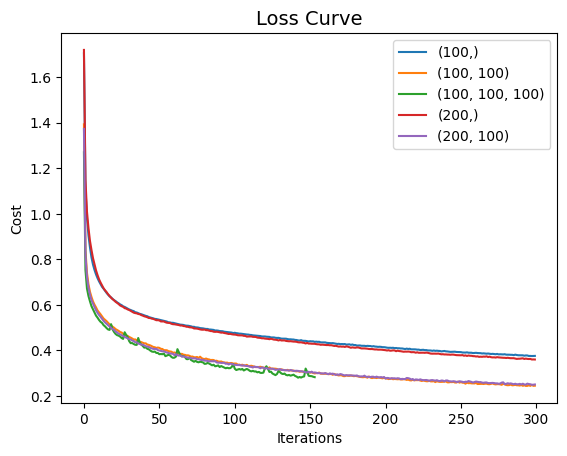

In [12]:
plt.figure()
for i in range (5):
  plt.plot(loss_curve[i])
  
plt.legend(neuron1)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         -87       1.00      1.00      1.00         1
         -86       1.00      1.00      1.00       107
         -85       0.91      1.00      0.95       186
         -84       1.00      0.99      0.99      1139
         -83       0.90      0.90      0.90        10
         -82       1.00      1.00      1.00         9
         -81       1.00      1.00      1.00         1
         -80       0.89      1.00      0.94         8
         -79       1.00      1.00      1.00       221
         -77       0.38      0.23      0.29        13
         -76       0.99      0.99      0.99       856
         -75       0.00      0.00      0.00         1
         -73       1.00      0.68      0.81        25
         -72       0.99      1.00      0.99       919
         -71       1.00      0.99      0.99       938
         -67       0.00      0.00      0.00         0
         -48       0.00      0.00      0.00         1
         -46       0.00    

/home/dwill148/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dwill148/.local/lib/python3.8/site-p

In [14]:
#defining y for reclong value and X for other values
y1= df_new['reclong']
y1=y1.astype('int')
X1=df_new[["id","mass (g)","year","nametype","fall","reclat"]]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state=20)


In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
Xtr1=scaler.transform(X_train)
Xts1=scaler.transform(X_test)

In [16]:
neuron1=[(100,), (100,100), (100,100,100), (200,), (200,100)]
ts_accuracy=[]
loss_curve=[]
for nn1 in neuron1:
  clf1 = MLPClassifier(nn1,learning_rate_init=0.1, activation="tanh", solver="sgd", random_state=20, max_iter=300)
  clf1.fit(Xtr1, y_train)
  y_pred1 = clf1.predict(Xts1)
  scores1=accuracy_score(y_test, y_pred1)
  ts_accuracy.append(scores1)
  loss_curve.append(clf1.loss_curve_)

/home/dwill148/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
ts_accuracy

[0.6866063229699594,
 0.7667584940312213,
 0.7910271546635183,
 0.6868686868686869,
 0.7664961301324937]

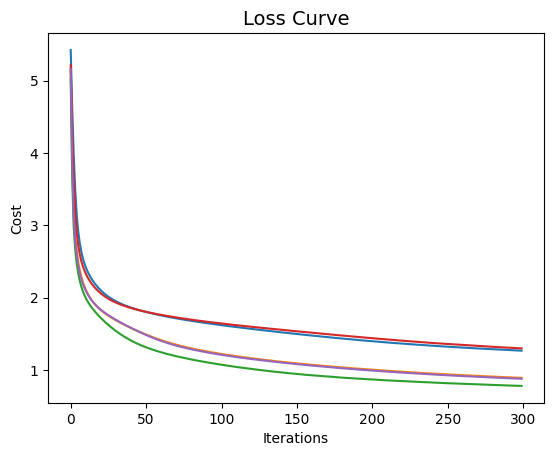

In [ ]:
plt.figure()
for i in range (5):
  plt.plot(loss_curve[i])

plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(neuron1)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

        -165       0.00      0.00      0.00         3
        -162       0.00      0.00      0.00         1
        -157       0.00      0.00      0.00         1
        -148       0.00      0.00      0.00         1
        -144       0.00      0.00      0.00         1
        -141       0.82      0.74      0.78        54
        -125       0.00      0.00      0.00         1
        -124       0.00      0.00      0.00         2
        -123       0.00      0.00      0.00         5
        -122       0.00      0.00      0.00         1
        -119       0.00      0.00      0.00         1
        -118       0.00      0.00      0.00         8
        -117       0.00      0.00      0.00        17
        -116       0.32      0.75      0.45        32
        -115       0.00      0.00      0.00        14
        -114       0.00      0.00      0.00        16
        -113       0.00      0.00      0.00         5
        -112       0.00    

/home/dwill148/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dwill148/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
